# Epistolary

In [1]:
import os,sys; sys.path.insert(0,os.path.abspath('../../..'))
import os,sys; sys.path.insert(0,'/Users/ryan/github/abslithist')
from epistolary import *
from abslithist import *

In [2]:
pam = get_pamela()
clar = get_clarissa()

[06:46:57] lltk.corpus.corpus.init():263: Initializing from metadata: [Epistolary](epistolary)
[06:46:57] lltk.corpus.corpus.init():263: Initializing from metadata: [Chadwyck](chadwyck)
[06:46:57] lltk.corpus.corpus.init():263: Initializing from metadata: [Epistolary](epistolary)


In [5]:
novel = get_evelina()
novel

[06:47:08] lltk.corpus.corpus.init():263: Initializing from metadata: [Epistolary](epistolary)


[TextEpistolaryChadwyck](_epistolary/_chadwyck/Eighteenth-Century_Fiction/burney.01)

In [66]:
def do_score(path):
    ofn=os.path.join(os.path.dirname(path), 'scores.pkl')
    with open(path) as f: txt=f.read()
    df=to_psgdf(txt, tfield='Abs-Conc.Median.C18')
    save_df(df, ofn)

res = pmap(do_score, paths, num_proc=4)

Mapping do_score() [x4]: 100%|██████████| 877/877 [00:18<00:00, 48.20it/s]


In [103]:

def get_score(path):
    fn=os.path.join(os.path.dirname(path), 'scores.pkl')
    if not os.path.exists(fn): do_score(path)
    df=read_df(fn)
    return dict(
        num_scored=len(df.val.dropna()),
        score=df.val.mean(),
    )

In [104]:
odf = pd.DataFrame([
    dict(
        i=i,
        **get_score(t.path_txt),
        **t.meta
    )
    for i,t in enumerate(tqdm(pam.letters.texts()))
])
odf=odf[odf.vol_i.apply(lambda x: type(x)==int)]
odf=odf[odf.vol_i<=2]
odf.sort_values('score')

100%|██████████| 252/252 [00:00<00:00, 536.56it/s]


,i,num_scored,score,id_orig,vol_i,letter_i,letter_ii,num_enclosed,depth_enclosed,txt_head,...,txt_end,sender_tok,recip_tok,num_words,id_parent,txt_front,date_ner,date_time,notes,id
104,104,34,-1.100863,Z300045447,2,87,1,0,0,SATURDAY,...,"I have had Reason to be disobliged with you,...",Mr. B,Mr. Longman,198.0,,"Morning, the Third of my happy Nuptials.",,,,L087b
51,51,105,-1.026053,Z300045399,1,41,3,0,0,,...,convince me of it? And why must I be close wat...,Pamela,Mr. B,550.0,,,,,,L041d
68,68,107,-1.007559,Z300045410,1,52,2,0,0,,...,"in sending you one way, when you hoped to go ...",Mr. B,Pamela,438.0,,,,,,L052c
57,57,25,-1.007290,Z300045403,1,45,2,0,0,,...,"Mrs. Jewkes, You have been very careful and di...",Mr. B,Mrs. Jewkes,130.0,,,,,,L045c
56,56,43,-0.993315,Z300045403,1,45,1,0,0,SUNDAY.,...,one of the loveliest Wives in England. She ha...,Mr. B,Arthur Williams,248.0,,,,,,L045b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,32,528,-0.002813,Z300045390,1,32,0,0,0,LETTER XXVIII.,...,have you done by me? -- I see I can confide i...,Pamela,John Andrews; Elizabeth Andrews,3094.0,,,,,,L032a
114,114,55,0.094772,Z300045456,2,96,0,0,0,SUNDAY Night.,...,"s pleas'd to come up to me, and said, Now, my ...",Pamela,Pamela,258.0,,,,,,L096a
23,23,216,0.097442,Z300045381,1,23,0,0,0,LETTER XX.,...,"ss God, to make him; so I thought it was but j...",Pamela,John Andrews; Elizabeth Andrews,1091.0,,,,,,L023a
59,59,99,0.133826,Z300045404,1,46,0,0,0,MONDAY Morning.,...,"is sadly torn, as is my Band. To be sure, I wa...",Arthur Williams,Mrs. Jewkes,417.0,,,,,,L046a


In [100]:
# odf.to_csv(f'{novel.corpus.path}/test_abs.csv')

In [88]:
odf['is_journal']=[
    (x=='Pamela' and y=='Pamela')
    for x,y in zip(odf.sender_tok, odf.recip_tok)
]

In [89]:
# odf.groupby('is_journal').score.mean()

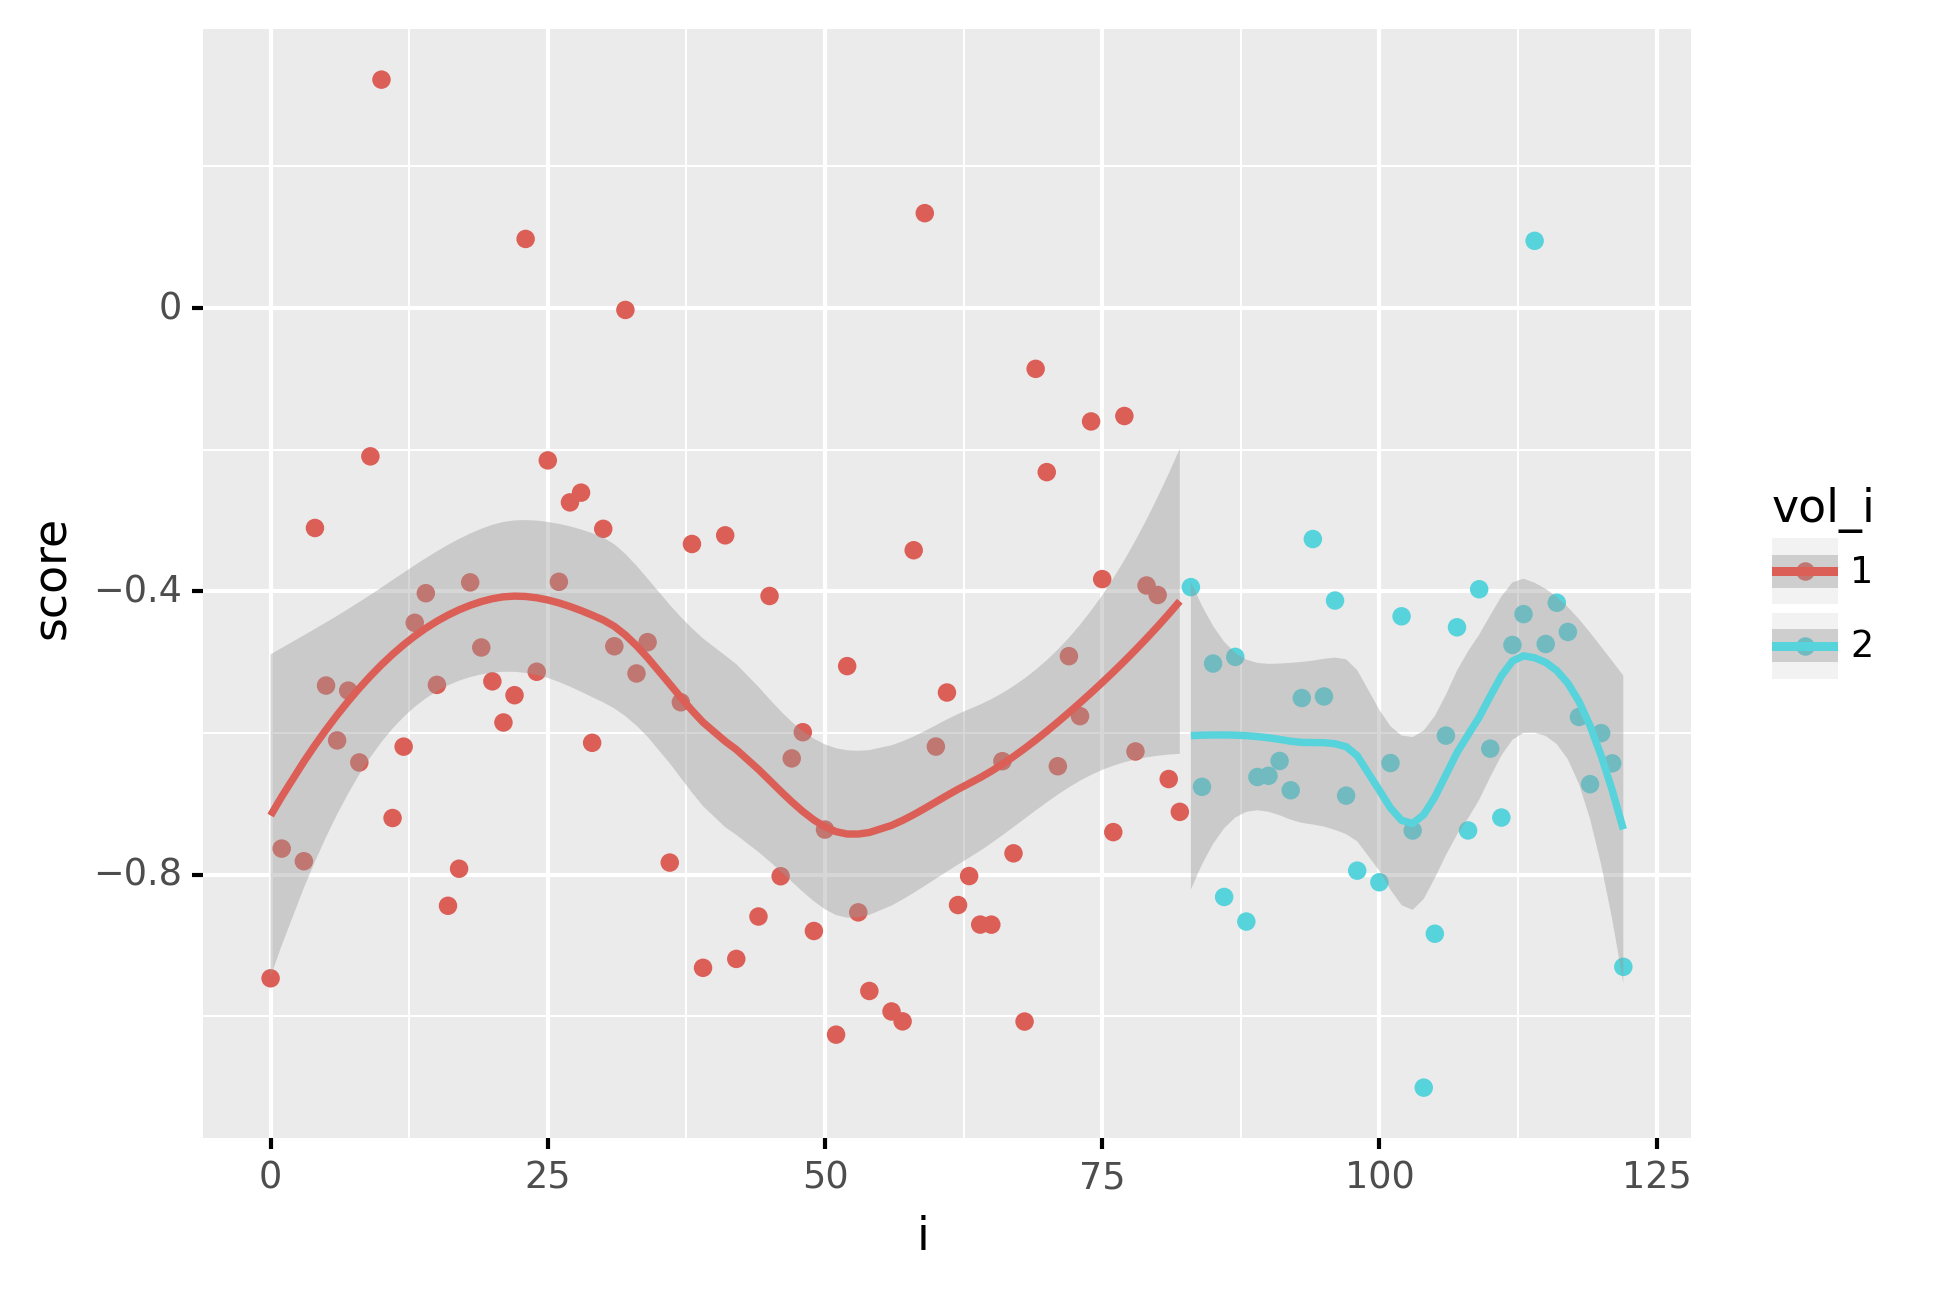

<ggplot: (700125194)>

In [108]:
figdf=odf[(odf.vol_i<=2) & (odf.num_scored>=25)]

#figdf
p9.ggplot(figdf, p9.aes(x='i',y='score', color='vol_i')) + p9.geom_point() + p9.geom_smooth()


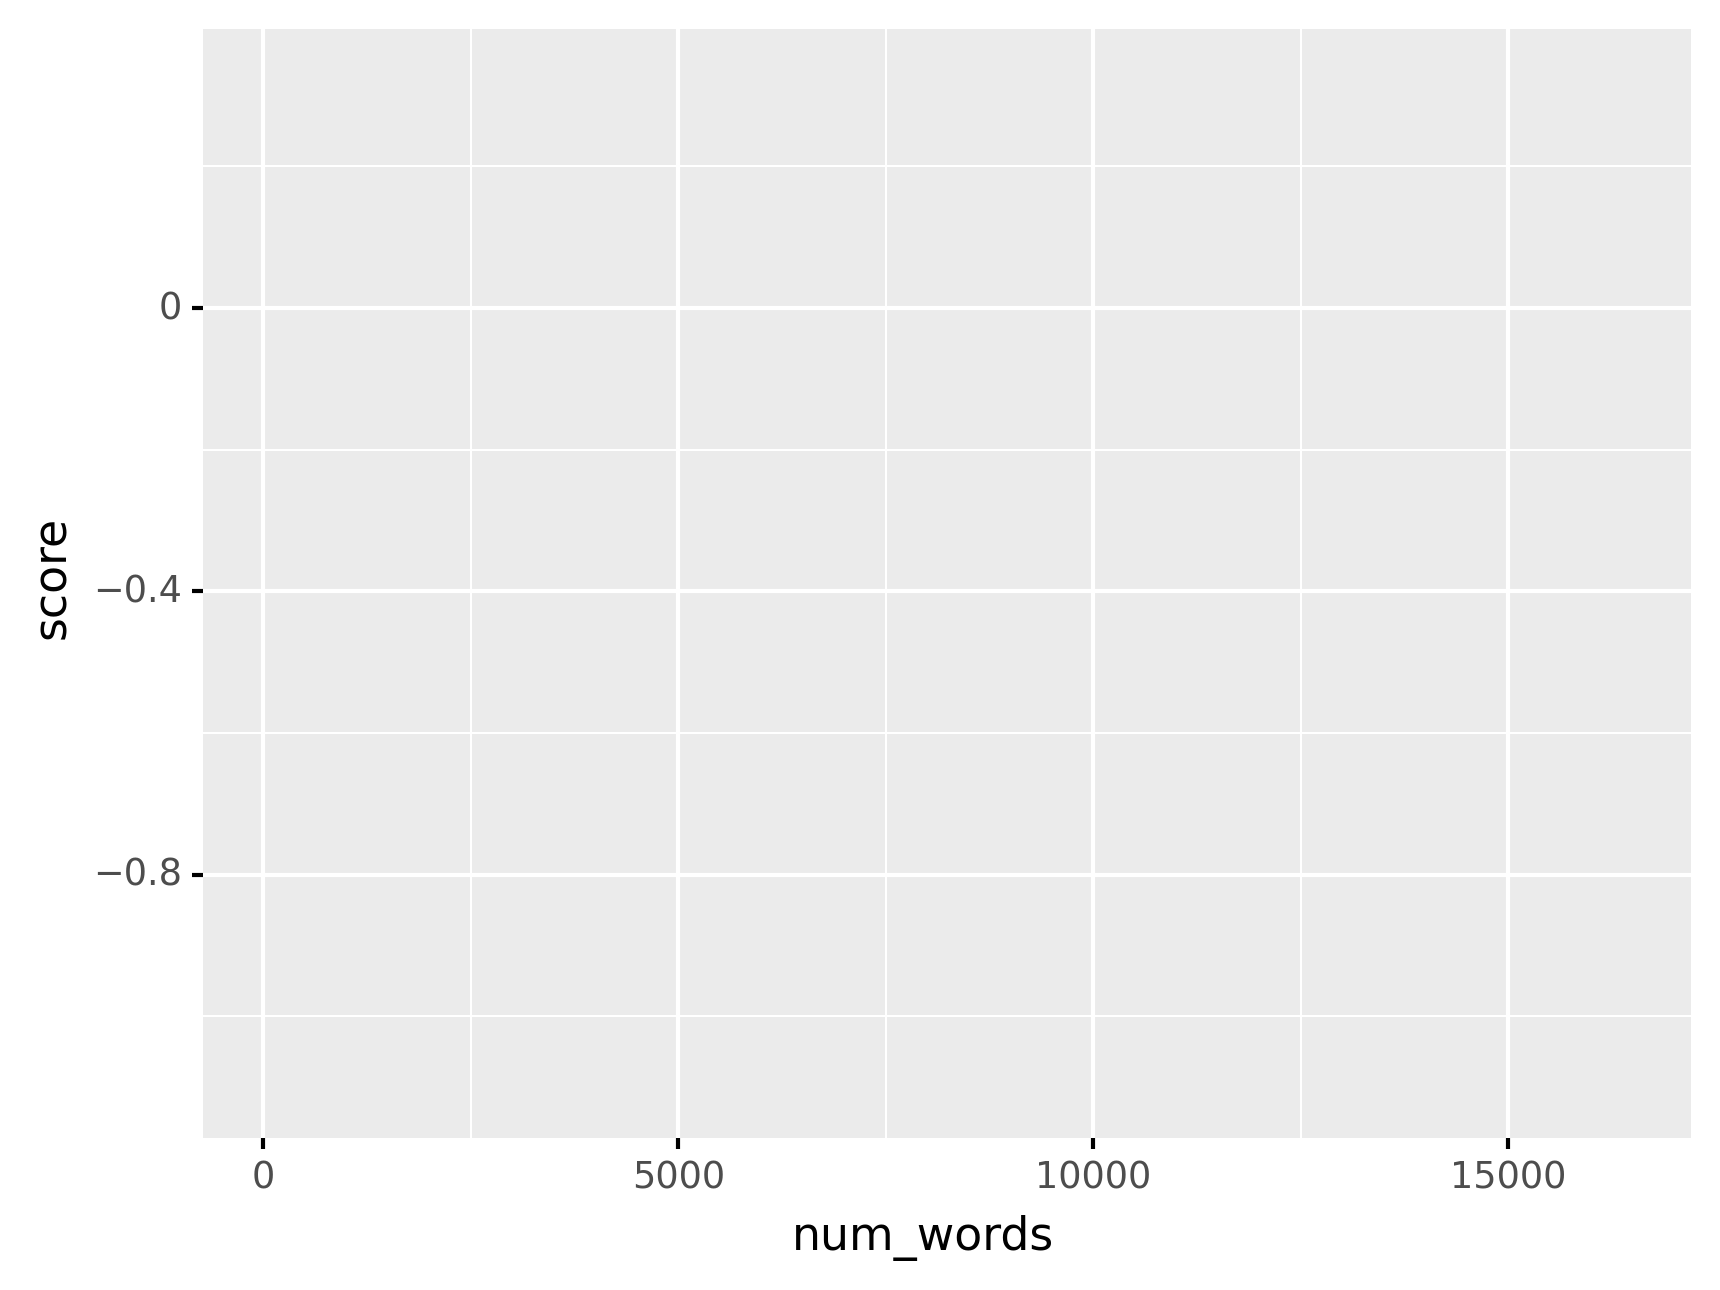

<ggplot: (734292366)>

In [84]:
p9.ggplot(figdf, p9.aes(x='num_words',y='score', color='vol_i'))


In [19]:
# pmap(do_score, paths, num_proc=2)

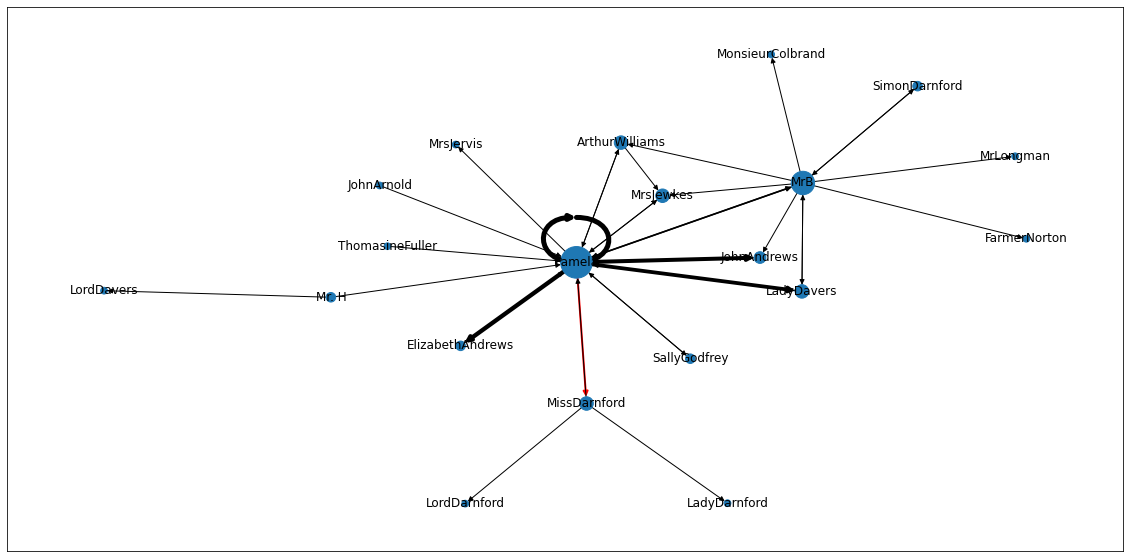

In [15]:
final_g=novel.letters.graph(min_weight=None)
draw_nx(final_g, color_by='t_new')

In [13]:
fn,fig=draw_nx_dynamic(novel.letters.graph_iter(), final_g=final_g, fps=5, color_by='t_new')
!open {fn}

Iterating over interactions: 100%|██████████| 625/625 [00:00<00:00, 5637505.38it/s]


Making movie (fig.dynamic_graph.mp4) [602)]...


In [45]:
g=next(graph_iter(novel.letters, interactions=novel.letters.interactions()))

OutEdgeView([('Pamela', 'JohnAndrews'), ('Pamela', 'ElizabethAndrews')])

False    275
Name: t, dtype: int64

In [ ]:
interactions(novel)

RuntimeError: super(): __class__ cell not found

In [6]:
novel.charsys.names(ignore_blank=True)

,character_tok,character_id,character_tok_count
657,Pamela,Pamela,1221
531,Mr. B,MrB,1189
279,God,?,1002
594,Mrs. Jervis,MrsJervis,991
395,Lady Davers,LadyDavers,430
...,...,...,...
592,Mrs. Godfrey,?,1
628,O Girl,?,1
633,O Man,?,1
634,O Miss,?,1


In [4]:
# CS = novel.characters()
# odf=CS.names(force=True, ignore_blank=False)
# odf

NameError: name 'CS' is not defined

In [7]:
novel.booknlp.names(ignore_blank=False)

100%|██████████| 252/252 [00:00<00:00, 650.67it/s]


,character_tok,character_id,character_tok_count
527,Mr. B,,1148
277,God,,1002
590,Mrs. Jervis,,988
653,Pamela,,956
517,Mother,,381
...,...,...,...
52,Battledors,,1
624,O Girl,,1
629,O Man,,1
630,O Miss,,1


In [5]:
novel.booknlp.interactions()

100%|██████████| 252/252 [00:38<00:00,  6.63it/s]


Saved: /Users/ryan/lltk_data/corpora/epistolary/texts/_chadwyck/Eighteenth-Century_Fiction/richards.04/characters/interactions/booknlp.pkl


AttributeError: 'DataFrame' object has no attribute 'source'

In [3]:

# novel.letters.metadata(force=True)
# novel.letters.save_metadata()
# novel.letters.metadata(force=True)


In [ ]:
#novel.letters.interactions()
novel.booknlp.init()

[17:23:34] lltk.corpus.corpus.init():263: Initializing from metadata: [SectionCorpusLetterChadwyck](letters)
Parsing texts via BookNLP [x1]:   0%|                                                                                                                        | 0/252 [00:00<?, ?it/s]

In [4]:
odf=novel.interactions()
odf

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [5]:
np.isnan??

Call signature:  np.isnan(*args, **kwargs)
Type:            ufunc
String form:     <ufunc 'isnan'>
File:            ~/miniforge3/envs/booknlp/lib/python3.10/site-packages/numpy/__init__.py
Docstring:      
isnan(x, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

Test element-wise for NaN and return result as a boolean array.

Parameters
----------
x : array_like
    Input array.
out : ndarray, None, or tuple of ndarray and None, optional
    A location into which the result is stored. If provided, it must have
    a shape that the inputs broadcast to. If not provided or None,
    a freshly-allocated array is returned. A tuple (possible only as a
    keyword argument) must have length equal to the number of outputs.
where : array_like, optional
    This condition is broadcast over the input. At locations where the
    condition is True, the `out` array will be set to the ufunc result.
    Elsewhere, the `out` array will retain it

In [1]:
g=get_letter_network_from_dfletters(novel.letters.interactions())

NameError: name 'get_letter_network_from_dfletters' is not defined

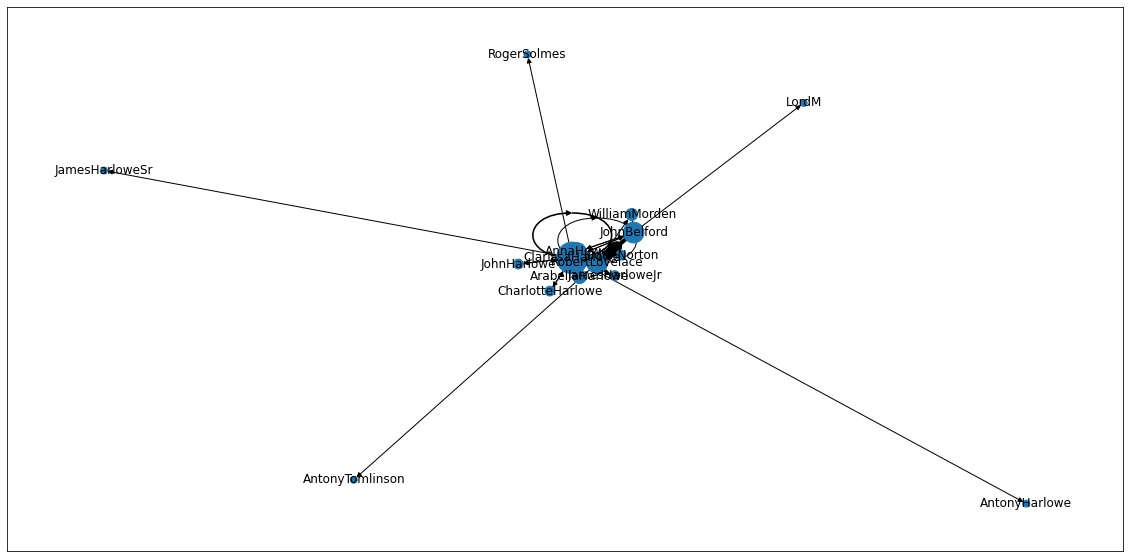

In [19]:
from lltk.model.characters import filter_graph
g=filter_graph(g,min_weight=1,remove_isolates=True)
draw_nx(g)

In [5]:
novel.letters.names()

,character_tok,character_id,character_tok_count
38,Miss Clarissa Harlowe,ClarissaHarlowe,268
41,Miss Howe,AnnaHowe,200
24,John Belford,JohnBelford,175
53,Mr. Lovelace,RobertLovelace,171
46,Mr. Belford,JohnBelford,77
...,...,...,...
51,Mr. James Harlowe,JamesHarlowe,1
52,Mr. John Harlowe,JohnHarlowe,1
16,Dr. H,DrHale,1
57,Mr. Wyerley,AlexWyerley,1


In [6]:
novel.booknlp.names()

[15:19:27] lltk.corpus.corpus.init():263: Initializing from metadata: [SectionCorpusLetterChadwyck](letters)
100%|██████████| 625/625 [00:00<00:00, 969.73it/s] 


,character_tok,character_id,character_tok_count
401,Mr. Lovelace,RobertLovelace,801
343,Miss Howe,AnnaHowe,613
228,Jack,JohnBelford,348
413,Mr. Solmes,RogerSolmes,309
287,Lovelace,RobertLovelace,278
...,...,...,...
292,M. Mr. Lovelace,RobertLovelace,1
428,Mrs. Annabella Howe,AnnabellaHowe,1
120,Dear Lovelace,RobertLovelace,1
408,Mr. Patrick McDonald,PatrickMcDonald,1


In [7]:
CS.names()

,character_tok,character_id,character_tok_count
422,Mr. Lovelace,RobertLovelace,972
362,Miss Howe,AnnaHowe,813
350,Miss Clarissa Harlowe,ClarissaHarlowe,499
240,Jack,JohnBelford,348
435,Mr. Solmes,RogerSolmes,309
...,...,...,...
254,John Belford Letters,JohnBelford,1
230,Honest Pritchard,Pritchard,1
229,Honest Joseph,JosephLeman,1
348,Miss Clar,ClarissaHarlowe,1


In [10]:
CS.init_names()

,character_tok,char_tok,character_id,character_id_auto,char_tok_count,charsys_id
1,Miss Clarissa Harlowe,Miss Clarissa Harlowe,ClarissaHarlowe,MissClarissaHarlowe,268,letters
2,Miss Howe,Miss Howe,AnnaHowe,MissHowe,200,letters
61,John Belford,John Belford,JohnBelford,JohnBelford,175,letters
7,Mr. Lovelace,Mr. Lovelace,RobertLovelace,MrLovelace,171,letters
18,Mr. Belford,Mr. Belford,JohnBelford,MrBelford,76,letters
...,...,...,...,...,...,...
444,Miss Rawlins,"Miss Rawlins , who could not but be pleased wi...",MissRawlins,MissRawlins,1,booknlp
442,Enter Moore,Enter goody Moore,?,EnterMoore,1,booknlp
441,Peter Partrick,Peter Partrick,?,PeterPartrick,1,booknlp
439,Mogholl,the Mogholl,?,Mogholl,1,booknlp


In [17]:
names(CS)

,character_tok,character_id,character_tok_count
422,Mr. Lovelace,RobertLovelace,972
362,Miss Howe,AnnaHowe,813
350,Miss Clarissa Harlowe,ClarissaHarlowe,499
240,Jack,JohnBelford,348
435,Mr. Solmes,RogerSolmes,309
...,...,...,...
254,John Belford Letters,JohnBelford,1
230,Honest Pritchard,Pritchard,1
229,Honest Joseph,JosephLeman,1
348,Miss Clar,ClarissaHarlowe,1


In [11]:
novel.characters().init_names_auto()

Counter()

In [3]:
novel.letters.names()

,character_tok,character_id,character_tok_count
38,Miss Clarissa Harlowe,ClarissaHarlowe,268
41,Miss Howe,AnnaHowe,200
24,John Belford,JohnBelford,175
53,Mr. Lovelace,RobertLovelace,171
46,Mr. Belford,JohnBelford,77
...,...,...,...
51,Mr. James Harlowe,JamesHarlowe,1
52,Mr. John Harlowe,JohnHarlowe,1
16,Dr. H,DrHale,1
57,Mr. Wyerley,AlexWyerley,1


In [9]:
novel.booknlp.init_names()

100%|██████████| 625/625 [00:00<00:00, 979611.36it/s]


In [6]:
novel.booknlp.names()

[14:40:44] lltk.corpus.corpus.init():263: Initializing from metadata: [SectionCorpusLetterChadwyck](letters)
100%|██████████| 625/625 [00:00<00:00, 794.62it/s]


,character_tok,character_tok_count,character_id
401,Mr. Lovelace,500625,RobertLovelace
343,Miss Howe,383125,AnnaHowe
228,Jack,217500,JohnBelford
413,Mr. Solmes,193125,RogerSolmes
287,Lovelace,173750,RobertLovelace
...,...,...,...
402,Mr. Lovelaee,625,
130,Dear Niece,625,
398,Mr. John,625,
133,Dearest,625,


In [15]:
CS.init_names()
CS.names()

,character_tok,character_id,character_id_auto,char_tok_count
455,Mr. Lovelace,?,MrLovelace,801
385,Miss Howe,?,MissHowe,613
251,Jack,?,Jack,348
471,Mr. Solmes,?,MrSolmes,309
319,Lovelace,?,Lovelace,278
...,...,...,...,...
151,Dearest Miss Rawlins,?,DearestMissRawlins,1
451,Mr. John,?,MrJohn,1
450,Mr. James Harlowe,JamesHarlowe,MrJamesHarlowe,1
153,Dido,?,Dido,1


In [25]:
len(novel.booknlp.init_names_anno())

0

In [5]:
# novel.booknlp.models()

In [3]:
# novel.letters.init_names()
# novel.letters._df_names

In [4]:
# novel.booknlp.init_names()

In [5]:
# novel.letters.path_names_anno

In [7]:
len(novel.letters.init_names_anno())

181

In [8]:
res=init_names_auto(novel.letters,force=True)

In [10]:
for model in CS.iter_models():
    print(model.path_interactions)

/Users/ryan/lltk_data/corpora/epistolary/texts/_chadwyck/Eighteenth-Century_Fiction/richards.01/characters/interactions/letters.pkl
/Users/ryan/lltk_data/corpora/chadwyck/texts/Eighteenth-Century_Fiction/richards.01/characters/interactions/booknlp.pkl


In [13]:
CS.interactions(force=True)

 14%|█▎        | 85/625 [00:05<00:33, 16.09it/s]


KeyboardInterrupt: 

In [5]:
novel.booknlp.interactions()

,source,rel,target,mention_diff,text_id,token_i,para_i,sent_i,sent_token_i
0,NARRATOR,mentioned,AnnaHowe,0,L001a,0,0,0,0
1,NARRATOR,mentioned,RobertLovelace,0,L001a,212,4,5,18
2,NARRATOR,mentioned,AnnaHowe,0,L001a,1210,15,33,44
3,NARRATOR,mentioned,RobertLovelace,0,L002a,449,6,11,9
4,NARRATOR,mentioned,LordM,0,L002a,500,7,13,8
...,...,...,...,...,...,...,...,...,...
7558,NARRATOR,mentioned,WilliamMorden,0,L527a,834,14,32,6
7559,WilliamMorden,mentioned_after,RobertLovelace,20,L527a,834,14,32,6
7560,NARRATOR,mentioned,RobertLovelace,0,L527a,935,16,40,15
7561,NARRATOR,mentioned,ClarissaHarlowe,0,L527a,1124,21,48,7


In [14]:
next(novel.booknlp.iter_interactions())

  0%|          | 0/625 [00:00<?, ?it/s]


{'source': 'NARRATOR',
 'rel': 'mentioned',
 'target': 'AnnaHowe',
 'mention_diff': 0,
 'text_id': 'L001a',
 'token_i': 0,
 'para_i': 0,
 'sent_i': 0,
 'sent_token_i': 0}

In [20]:
xdf=interactions(novel)
odf=pd.DataFrame(xdf)
odf
odf[(odf.target=="") | (odf.source=="")]
odf[odf.rel.str.contains('enclose')]
odf[~odf.rel.str.contains('enclose')]

,source,rel,target,text_id,source_tok,target_tok
0,AnnaHowe,wrote_letter_to,ClarissaHarlowe,L001a,Miss Anna Howe,Miss Clarissa Harlowe
1,ClarissaHarlowe,wrote_letter_to,AnnaHowe,L002a,Miss Clarissa Harlowe,Miss Howe
2,ClarissaHarlowe,wrote_letter_to,AnnaHowe,L003a,Miss Clarissa Harlowe,Miss Howe
3,ClarissaHarlowe,wrote_letter_to,AnnaHowe,L004a,Miss Clarissa Harlowe,Miss Howe
4,ClarissaHarlowe,wrote_letter_to,AnnaHowe,L005a,Miss Clarissa Harlowe,Miss Howe
...,...,...,...,...,...,...
711,RobertLovelace,wrote_letter_to,JohnBelford,L525b,Mr. Lovelace,John Belford
712,WilliamMorden,wrote_letter_to,RobertLovelace,L525c,Wm. Morden,[Lovelace]
714,RobertLovelace,wrote_letter_to,WilliamMorden,L525d,R. Lovelace,[Wm. Morden]
716,RobertLovelace,wrote_letter_to,JohnBelford,L526a,Mr. Lovelace,John Belford


,source,rel,target,text_id,source_tok,target_tok


,source,rel,target,text_id,source_tok,target_tok
268,ClarissaHarlowe,enclosed_a_letter_written_by,ThomasDoleman,L126b,Miss Clarissa Harlowe,Mr. Doleman
141,ClarissaHarlowe,enclosed_a_letter_written_by,ClarissaHarlowe,L053b,Miss Clarissa Harlowe,Miss Clarissa Harlowe
417,RobertLovelace,enclosed_a_letter_written_to,RobertLovelace,L227b,Mr. Lovelace,Robert Lovelace
474,RobertLovelace,enclosed_a_letter_written_to,JamesHarloweSr,L254b,Mr. Lovelace,"James Harlowe, Sr"
45,ClarissaHarlowe,enclosed_a_letter_written_to,ClarissaHarlowe,L025b,Miss Clarissa Harlowe,Miss Clarissa Harlowe
509,RobertLovelace,enclosed_a_letter_written_to,DorcasMartindale,L262b,Mr. Lovelace,Dorcas Martindale
485,RobertLovelace,enclosed_a_letter_written_by,ClarissaHarlowe,L254b,Mr. Lovelace,[Clarissa Harlowe]?
411,RobertLovelace,enclosed_a_letter_written_by,RobertLovelace,L225b,Mr. Lovelace,Mr. Lovelace
405,RobertLovelace,enclosed_a_letter_written_by,WillSummers,L225b,Mr. Lovelace,WM. Summers
76,ClarissaHarlowe,enclosed_a_letter_written_to,ClarissaHarlowe,L032b,Miss Clarissa Harlowe,Miss Clarissa Harlowe


In [26]:
letters.meta

,id_orig,vol_i,letter_i,letter_ii,num_enclosed,depth_enclosed,txt_head,txt_front,txt_start,txt_end,sender_tok,recip_tok,date_ner,date_time,date,num_words,id_parent,place,notes,place_ner
id,,,,,,,,,,,,,,,,,,,,
L001a,Z300044056,1,1,0,0,0,LETTER I.,"Miss Anna Howe, To Miss Clarissa Harlowe.","Jan. 10. I am extremely concerned, my dearest...","s and directresses: for your mamma, admirably ...",Miss Anna Howe,Miss Clarissa Harlowe,Jan. 10,2022-01-10 00:00:00,Jan. 10,1073,,,NaN,
L002a,Z300044057,1,2,0,0,0,LETTER II.,"Miss Clarissa Harlowe, To Miss Howe.","Harlowe-Place, Jan. 13. How you oppress me, m...","denial: Yet gave him reason to think, that she...",Miss Clarissa Harlowe,Miss Howe,Jan. 13,2022-01-13 00:00:00,Jan. 13,2129,,Harlowe-Place,NaN,Harlowe-Place
L003a,Z300044058,1,3,0,0,0,LETTER III.,"Miss Clarissa Harlowe, To Miss Howe.","Jan. 13, 14. And thus, as Mr. Lovelace though...",", what a visible Struggle it cost him to chang...",Miss Clarissa Harlowe,Miss Howe,Jan. 13 | 14,2014-01-13 00:00:00,Jan. 13-14,2597,,Harlowe-Place,NaN,
L004a,Z300044059,1,4,0,0,0,LETTER IV.,"Miss Clarissa Harlowe, To Miss Howe.","This, my dear, was the situation Mr. Lovelace ...","ll not be taken as any, since my son James can...",Miss Clarissa Harlowe,Miss Howe,,,,3445,,Harlowe-Place,NaN,Scotland
L005a,Z300044060,1,5,0,0,0,LETTER V.,"Miss Clarissa Harlowe, To Miss Howe.",Jan. 20. I have been hinder'd from prosecutin...,"imes -- Indeed he is not dutiful. -- But, poss...",Miss Clarissa Harlowe,Miss Howe,Jan. 20,2022-01-20 00:00:00,Jan. 20,1044,,Harlowe-Place,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L525b,Z300044595,7,525,1,2,0,LETTER CXI.,"Mr. Lovelace, To John Belford, Esq; | * * | * *","Lintz, Nov. 28. ‚™Ü‚™ÜDec. 9. I am now on my ...","out of my breast with my own hands, were it ca...",Mr. Lovelace,John Belford,Nov. 28 | Dec. 9,None,Nov. 28 | Dec. 9,1844,,Trent,NaN,Trent
L525c,Z300044595,7,525,2,0,1,,,"Munich, Nov. 21. ‚™Ü‚™ÜDec. 2. Sir, Your lett...",s to pursue. But being disappointed in my hop...,Wm. Morden,[Lovelace],Nov. 21 | Dec. 2 | four days,None,Nov. 21 | Dec. 2 | four days,248,L525b,Munich | Florence,NaN,Munich | Florence
L525d,Z300044595,7,525,3,0,1,,,"Vienna, Nov. 25. ‚™Ü‚™ÜDec. 6. Sir, I have th...","Vienna, Nov. 25. ‚™Ü‚™ÜDec. 6. Sir, I have th...",R. Lovelace,[Wm. Morden],Nov. 25 | Dec. 6,None,Nov. 25 | Dec. 6,117,L525b,Vienna,NaN,Vienna


In [13]:
xdf[xdf.source==""]

,source_tok,source,rel,target_tok,target,text_id


In [11]:
# !pip install dateparser

[10:55:00] lltk.corpus.corpus.metadata():256: Generating metadata dataframe
[10:55:00] lltk.corpus.corpus.init():239: Initializing from metadata: [Epistolary](epistolary)
[10:55:00] lltk.corpus.corpus.init():239: Initializing from metadata: [Chadwyck](chadwyck)
Iterating over texts: 100%|██████████| 5/5 [00:00<00:00, 6112.36it/s]
[10:55:00] lltk.corpus.corpus.metadata():269: Returning dataframe of (5, 12) dimensions


,testing,author,title,year,idref,pub,type,name,nation,medium,subcorpus,fn_raw
id,,,,,,,,,,,,
Eighteenth-Century_Fiction/richards.02,x,,,,,,,,,,,
_chadwyck/Eighteenth-Century_Fiction/richards.04,y,"Richardson, Samuel, 1689-1761",Pamela (1741),1741,Z200045357,"Printed for C. Rivington, in St. Paul's Church...",BOOK,Vol. 1,British,Fiction,Eighteenth-Century_Fiction,Eighteenth-Century_Fiction/richards.04.new
_chadwyck/Eighteenth-Century_Fiction/burney.01,,"Burney, Fanny, 1752-1840",Evelina (1778),1778,Z200000830,"Printed for T. Lowndes, [etc.]",BOOK,Vol. 1,British,Fiction,Eighteenth-Century_Fiction,Eighteenth-Century_Fiction/burney.01.new
_chadwyck/Eighteenth-Century_Fiction/richards.01,,"Richardson, Samuel, 1689-1761",Clarissa (1st ed.) (1748),1748,Z200044053,Printed for S. Richardson: [etc.],BOOK,Vol. 1,British,Fiction,Eighteenth-Century_Fiction,Eighteenth-Century_Fiction/richards.01.new
_chadwyck/Eighteenth-Century_Fiction/haywood.02,,,,,,,,,,,,


In [4]:
pd.to_numeric(clarissa_letters.meta.num_words).sum(), clarissa_letters.length

(846924, 864724)

In [5]:
# clarissa_letters.meta.groupby('sender_tok').num_words.sum().sort_values(ascending=False).head(10)
# clarissa_letters.meta.groupby('recip_tok').num_words.sum().sort_values(ascending=False).head(10)

## Pamela

In [49]:
# pamela = C.textd['_chadwyck/Eighteenth-Century_Fiction/richards.04']
# pamela_letters = pamela.sections
# pamela_letters.meta

In [50]:
# pd.to_numeric(pamela_letters.meta.num_words).sum(), pamela.length

## Evelina

In [51]:
evelina = C.textd['_chadwyck/Eighteenth-Century_Fiction/burney.01']
evelina_letters = evelina.sections
evelina_letters.meta

[10:51:08] lltk.corpus.corpus.metadata():251: Generating metadata dataframe
[10:51:08] lltk.corpus.corpus.init():234: Initializing from metadata: [SectionCorpusLetterChadwyck](_chadwyck/EighteenthCentury_Fiction/burney01/sections)
Iterating over texts: 100%|██████████| 91/91 [00:00<00:00, 613636.12it/s]
[10:51:08] lltk.corpus.corpus.metadata():264: Returning dataframe of (91, 17) dimensions


,id_orig,vol_i,letter_i,letter_ii,num_enclosed,depth_enclosed,txt_head,txt_front,txt_start,txt_end,sender_tok,recip_tok,num_words,date_ner,date_time,place_ner,id_parent
id,,,,,,,,,,,,,,,,,
L001a,Z300000836,1,1,0,0,0,LETTER I.,Lady Howard to the Rev. Mr. Villars.,"Howard Grove. Can there, my good Sir, be any ...",er peace and her reputation. Notwithstanding I...,Lady Howard,Mr. Villars,566,,,,
L002a,Z300000837,1,2,0,0,0,LETTER II.,Mr. Villars to Lady Howard.,"Berry Hill, Dorsetshire. Your Ladyship did bu...",", I fear my fortitude would have been unequal ...",Mr. Villars,Lady Howard,1470,,,Berry Hill | Dorsetshire,
L003a,Z300000838,1,3,0,0,0,LETTER III.,[Written some months after the last.] Lady Ho...,"Howard Grove, March 8. Dear and Rev. Sir, You...",tly their wish to enlarge and enliven their pa...,Lady Howard,Mr. Villars,431,some months after the last | March 8,None,,
L004a,Z300000839,1,4,0,0,0,LETTER IV.,Mr. Villars to Lady Howard.,"Berry Hill, March 12. I am grieved, Madam, to...",et I have thought it necessary to let her be h...,Mr. Villars,Lady Howard,891,2022-03-12 00:00:00,2022-03-12 00:00:00,,
L005a,Z300000840,1,5,0,0,0,LETTER V.,Mr. Villars to Lady Howard.,"March 18. Dear Madam, This letter will be del...","March 18. Dear Madam, This letter will be del...",Mr. Villars,Lady Howard,124,2022-03-18 00:00:00,2022-03-18 00:00:00,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L081c,Z300000920,3,81,2,0,1,,To Miss Anville.,I Have this moment received intelligence that ...,e's name. The views which I am now going to a...,?,Miss Anville,478,,,,L081b
L081d,Z300000920,3,81,3,0,1,,To Sir Clement Willoughby.,"Sir, The letter you have been pleased to addre...","Sir, The letter you have been pleased to addre...",?,Sir Clement Willoughby,92,,,,L081b
L082a,Z300000921,3,82,0,0,0,LETTER XXI.,Evelina in continuation.,"Clifton, October 13. The time approaches now,...","!"" I could make no reply; indeed I hardly spo...",?,?,5640,2022-10-13 00:00:00,2022-10-13 00:00:00,Clifton,


In [52]:
evelina_letters.meta.num_words.sum(), evelina.length

(153512, 155077)

In [53]:
# evelina_letters.meta.groupby('sender_tok').num_words.sum().sort_values(ascending=False)
# evelina_letters.meta.groupby('recip_tok').num_words.sum().sort_values(ascending=False)

## Haywood

In [54]:
betsy = C.textd['_chadwyck/Eighteenth-Century_Fiction/haywood.02']
betsy_letters = betsy.sections
betsy_letters.meta

[10:51:14] lltk.corpus.corpus.metadata():251: Generating metadata dataframe
[10:51:14] lltk.corpus.corpus.init():234: Initializing from metadata: [SectionCorpusLetterChadwyck](_chadwyck/EighteenthCentury_Fiction/haywood02/sections)
Iterating over texts: 100%|██████████| 78/78 [00:00<00:00, 235.03it/s]
[10:51:14] lltk.corpus.corpus.metadata():264: Returning dataframe of (78, 15) dimensions


,id_orig,vol_i,letter_i,letter_ii,num_enclosed,depth_enclosed,txt_head,txt_front,txt_start,txt_end,sender_tok,recip_tok,num_words,date_ner,date_time
id,,,,,,,,,,,,,,,
L001a,Z300029804,1,1,0,0,0,CHAP. III.,"Affords matter of condolance, or railery, acco...","""Dear Miss, I must certainly be either the mos...","er the most ungrateful, or most consumedly dul...",?,?,199,,
L002b,Z300029805,1,2,1,0,0,CHAP IV.,"Verifies the old proverb, that one affliction ...","""Most adored of your sex, I doubt not but you ...",even tho' it be to take a last farewell. I hav...,?,?,533,,
L002c,Z300029805,1,2,2,0,0,,,"""Sir, Tho' it is my fixed determination to enc...","""Sir, Tho' it is my fixed determination to enc...",?,?,92,,
L003a,Z300029809,1,3,0,0,0,CHAP. VIII.,"Relates how, by a concurrence of odd circumsta...","Most dear and honoured madam, ""My brother Fran...","Most dear and honoured madam, ""My brother Fran...",?,?,137,,
L004a,Z300029810,1,4,0,0,0,CHAP. IX.,Contains such things as might be reasonably ex...,"""My dear sister, I have endangered my life, an...","""My dear sister, I have endangered my life, an...",?,?,118,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L048d,Z300029901,4,48,3,0,0,,"To mrs. Munden,","''Madam, I am now more unhappy than ever; --...","''Madam, I am now more unhappy than ever; --...",?,?,101,,
L048e,Z300029901,4,48,4,0,0,,"To Charles Trueworth, Esq;","''Sir, The generous concern you express for my...","''Sir, The generous concern you express for my...",?,Charles Trueworth,56,,
L048f,Z300029901,4,48,5,0,0,,"To Charles Trueworth, Esq;","''Sir, I should be unjust to myself, as well a...","''Sir, I should be unjust to myself, as well a...",?,Charles Trueworth,84,,


In [55]:
betsy_letters.meta.groupby('sender_tok').num_words.sum().sort_values(ascending=False)
# betsy_letters.meta.groupby('recip_tok').num_words.sum().sort_values(ascending=False)

Iterating over texts:  33%|███▎      | 64/196 [00:33<01:09,  1.89it/s]


TypeError: can only concatenate str (not "int") to str

In [ ]:
betsy_letters.meta.num_words.sum(), betsy.length

(20749, 226950)